## Using pandas to prepare pumpkin data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

pumpkins = pd.read_csv('../data/US-pumpkins.csv')
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
columns_to_select = ['Package', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.loc[:, columns_to_select]

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2
month = pd.DatetimeIndex(pumpkins['Date']).month

new_pumpkins = pd.DataFrame({'Month' : month, 'Package' : pumpkins['Package'], 'Low Price' : pumpkins['Low Price'], 'High Price' : pumpkins['High Price'], 'Price' : price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

## Plotting the data using matplotlib

Text(0, 0.5, 'Average Pumpkin Price per bushel')

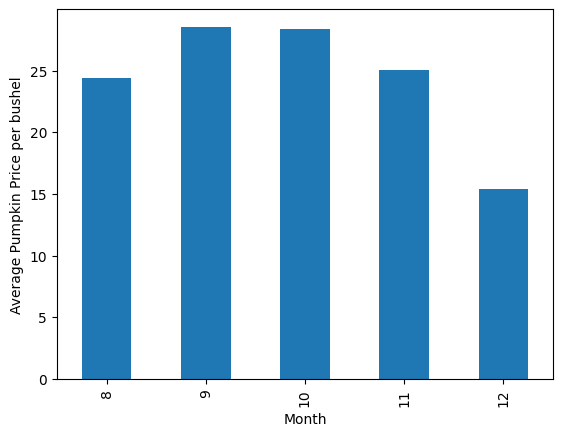

In [33]:
plot_price = new_pumpkins.Price
plot_month = new_pumpkins.Month
plt.scatter(plot_price, plot_month)
# plt.show()

new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel('Average Pumpkin Price per bushel')